In [ ]:
• Load the NETFLIX dataset into a
Pandas DataFrame.

In [36]:
import pandas as pd

In [37]:
import matplotlib.pyplot as plt

In [38]:
import seaborn as sns

In [2]:
Netflix=pd.read_csv("netflix dataset.csv")

In [39]:
Netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


In [4]:
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
top_country=Netflix["country"].value_counts().head(10)

In [11]:
print(top_country)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


In [40]:
Netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        98
release_year       0
rating             4
duration           3
listed_in          0
description        0
year_added        98
dtype: int64

In [45]:
Netflix["country"] = Netflix["country"].fillna("unknown")
Netflix["cast"] = Netflix["cast"].fillna("Not specified")
Netflix["director"] = Netflix["director"].fillna("Not specified")

In [46]:
Netflix = Netflix.dropna(subset=['date_added', 'rating', 'duration'])

In [47]:
Netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
dtype: int64

In [41]:
Netflix.describe()

,date_added,release_year,year_added
count,8709,8807.000000,8709.000000
mean,2019-05-23 01:45:29.452290816,2014.180198,2018.887932
min,2008-01-01 00:00:00,1925.000000,2008.000000
25%,2018-04-20 00:00:00,2013.000000,2018.000000
50%,2019-07-12 00:00:00,2017.000000,2019.000000
75%,2020-08-26 00:00:00,2019.000000,2020.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000
std,NaN,8.819312,1.567961


In [42]:
type_year = Netflix.groupby(['year_added', 'type']).size().unstack().fillna(0)
average_by_type = type_year.mean()

In [43]:
type_year

type,Movie,TV Show
year_added,,
2008.0,1.0,1.0
2009.0,2.0,0.0
2010.0,1.0,0.0
2011.0,13.0,0.0
2012.0,3.0,0.0
2013.0,6.0,4.0
2014.0,19.0,4.0
2015.0,56.0,17.0
2016.0,253.0,165.0


In [44]:
average_by_type

type
Movie      437.928571
TV Show    184.142857
dtype: float64

In [24]:
type_counts = Netflix['type'].value_counts()
type_percent = type_counts / type_counts.sum() * 100

In [23]:
type_counts

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [25]:
type_percent

type
Movie      69.615079
TV Show    30.384921
Name: count, dtype: float64

In [30]:
titles_per_year = Netflix['year_added'].value_counts().sort_index()
average_yearly = titles_per_year.mean()
most_active_year = titles_per_year.idxmax()
most_titles = titles_per_year.max()

In [32]:
titles_per_year

year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64

In [33]:
average_yearly

622.0714285714286

In [34]:
most_active_year

2019.0

In [35]:
most_titles

1999

C:\Users\DELL\AppData\Local\Temp\ipykernel_21784\3718900201.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_country.values,y=top_country.index,palette="rocket")


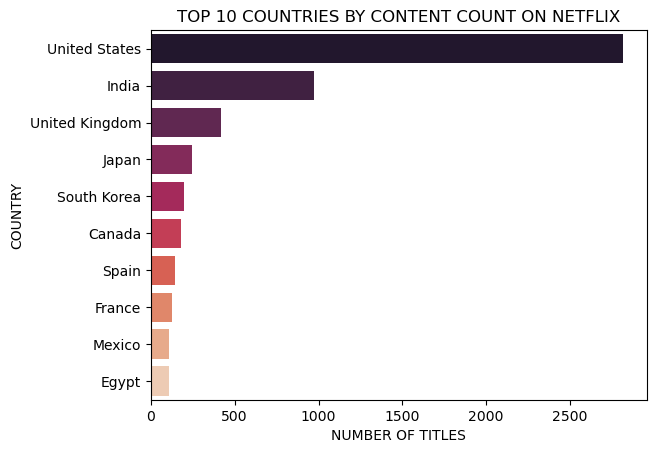

In [13]:
sns.barplot(x=top_country.values,y=top_country.index,palette="rocket")
plt.title("TOP 10 COUNTRIES BY CONTENT COUNT ON NETFLIX")
plt.xlabel("NUMBER OF TITLES")
plt.ylabel("COUNTRY")
plt.show()

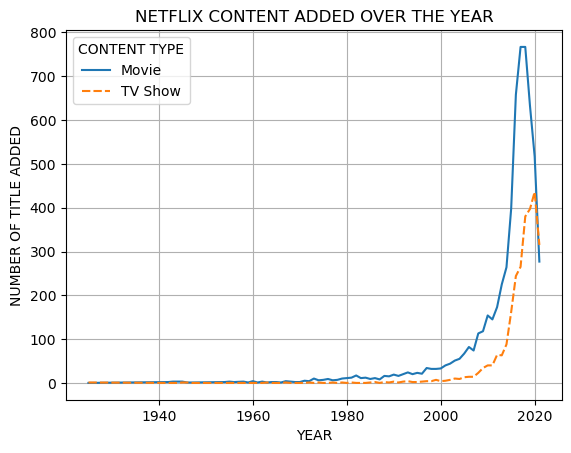

In [18]:
content_by_year = Netflix.groupby(["release_year", "type"]).size().unstack().fillna(0)
sns.lineplot(data=content_by_year)
plt.title("NETFLIX CONTENT ADDED OVER THE YEAR")
plt.xlabel("YEAR")
plt.ylabel("NUMBER OF TITLE ADDED")
plt.legend(title="CONTENT TYPE")
plt.grid(True)
plt.show()

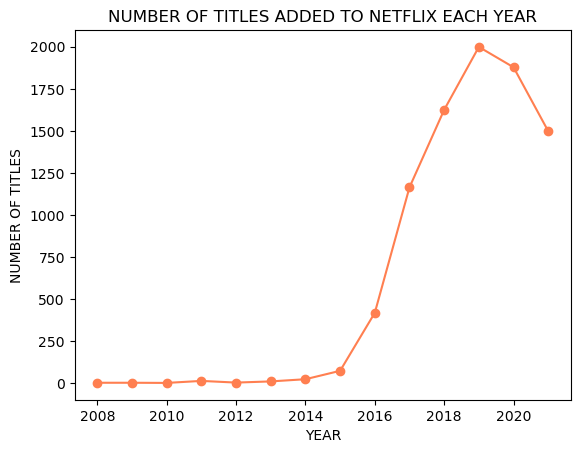

In [20]:
Netflix["date_added"] = pd.to_datetime(Netflix["date_added"], errors="coerce")
Netflix["year_added"] = Netflix["date_added"].dt.year
yearly_counts = Netflix["year_added"].value_counts().sort_index()
yearly_counts.plot(kind="line", marker="o", color="coral")
plt.title("NUMBER OF TITLES ADDED TO NETFLIX EACH YEAR")
plt.xlabel("YEAR")
plt.ylabel("NUMBER OF TITLES")
plt.show()

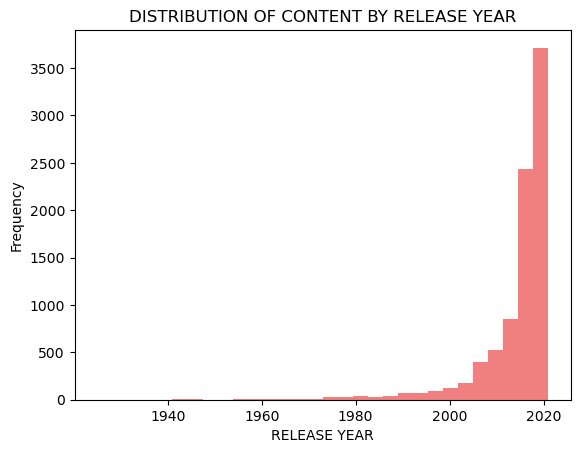

In [49]:
Netflix["release_year"].plot(kind="hist", bins=30, color="lightcoral")
plt.title("DISTRIBUTION OF CONTENT BY RELEASE YEAR")
plt.xlabel("RELEASE YEAR")
plt.show()

In [52]:
movies = Netflix[Netflix["type"] == "Movie"].copy()
movies["duration_minutes"] = movies["duration"].str.extract("(\d+)").astype(float)
selected_ratings = ["PG", "TV-MA", "R", "PG-13", "G"]
filtered_movies = movies[movies["rating"].isin(selected_ratings)]

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DELL\AppData\Local\Temp\ipykernel_21784\3928230175.py:2: SyntaxWarning: invalid escape sequence '\d'
  movies["duration_minutes"] = movies["duration"].str.extract("(\d+)").astype(float)


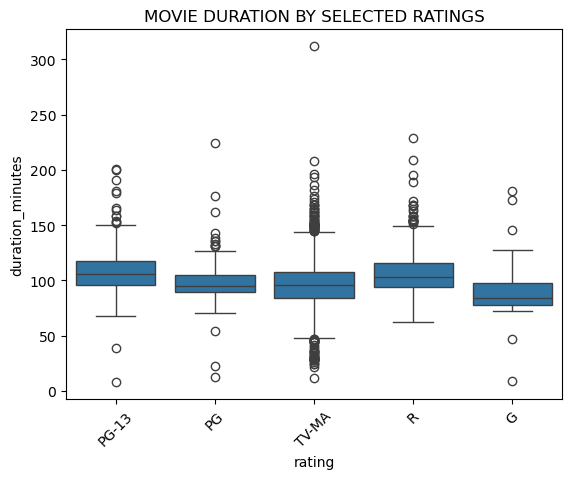

In [53]:
sns.boxplot(data=filtered_movies, x="rating", y="duration_minutes")
plt.title("MOVIE DURATION BY SELECTED RATINGS")
plt.xticks(rotation=45)
plt.show()